# Homework 5 - USA Airport Flight Analysis

<p align="center">
  <img src="https://gtm-24.de/wp-content/uploads/2019/11/GTM-24-55.jpg">
</p>


Air travel connects cities across the United States, forming a dense and dynamic network of routes that play a critical role in transportation, commerce, and connectivity. In this assignment, you will analyze the USA Airport Dataset, which includes detailed information about airports, routes, and traffic patterns. Your task is to uncover meaningful insights such as identifying the busiest hubs, analyzing flight routes. Additionally, you will explore the network structure to detect communities of interconnected airports, evaluate their centrality, and assess the impact of disruptions. This analysis will require the application of data visualization, network analysis, and optimization techniques to deliver actionable findings.

---

**Install and Import packages**

In [ ]:
!pip3 install networkx pyvis


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install kaggle


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
import numpy as np
import importlib
import seaborn as sns
import zipfile
from matplotlib import pyplot as plt


**Download a Dataset**

In [ ]:
!kaggle datasets download -d flashgordon/usa-airport-dataset


Dataset URL: https://www.kaggle.com/datasets/flashgordon/usa-airport-dataset
License(s): CC0-1.0




  0%|          | 0.00/40.8M [00:00<?, ?B/s]
  2%|▏         | 1.00M/40.8M [00:00<00:13, 3.09MB/s]
  5%|▍         | 2.00M/40.8M [00:00<00:09, 4.23MB/s]
  7%|▋         | 3.00M/40.8M [00:00<00:07, 5.08MB/s]
 10%|▉         | 4.00M/40.8M [00:00<00:07, 5.11MB/s]
 12%|█▏        | 5.00M/40.8M [00:01<00:07, 5.20MB/s]
 15%|█▍        | 6.00M/40.8M [00:01<00:06, 5.54MB/s]
 17%|█▋        | 7.00M/40.8M [00:01<00:06, 5.88MB/s]
 20%|█▉        | 8.00M/40.8M [00:01<00:05, 5.93MB/s]
 22%|██▏       | 9.00M/40.8M [00:01<00:05, 6.17MB/s]
 24%|██▍       | 10.0M/40.8M [00:01<00:06, 5.37MB/s]
 27%|██▋       | 11.0M/40.8M [00:02<00:06, 5.01MB/s]
 29%|██▉       | 12.0M/40.8M [00:02<00:05, 5.10MB/s]
 32%|███▏      | 13.0M/40.8M [00:02<00:05, 4.94MB/s]
 34%|███▍      | 14.0M/40.8M [00:02<00:06, 4.67MB/s]
 37%|███▋      | 15.0M/40.8M [00:03<00:06, 4.26MB/s]
 39%|███▉      | 16.0M/40.8M [00:03<00:05, 4.46MB/s]
 42%|████▏     | 17.0M/40.8M [00:03<00:05, 4.51MB/s]
 44%|████▍     | 18.0M/40.8M [00:03<00:05, 4.78MB/s]
 

In [ ]:
# Unzip the downloaded dataset
with zipfile.ZipFile("usa-airport-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")  # Extract to a folder named "dataset"

airports_df = pd.read_csv("dataset/Airports2.csv")


**Dataset Info**

In [ ]:
airports_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 412.8+ MB


In [ ]:
airports_df.head()


,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


## 1. Flight Network Analysis (Q1)

The dataset contains information about flights between airports in the United States. You can download and explore the dataset [here](https://www.kaggle.com/datasets/flashgordon/usa-airport-dataset). In this task, you will analyze the basic features of the flight network graph, such as its size, density, and degree distribution.

---

### **Your Task:**

1. Implement a function `analyze_graph_features(flight_network)` that takes the flight network as input and computes the following:
    - Count the number of airports (nodes) and flights (edges) in the graph.
    - Compute the density of the graph using the formula:  $Density=\frac{2 \cdot E}{N \cdot (N - 1)}$
    - Calculate both in-degree and out-degree for each airport and visualize them using histograms.
    - Identify airports with degrees higher than the 90th percentile and list them as "hubs."
    - Determine if the graph is sparse or dense based on its density.

2. Write a function `summarize_graph_features(flight_network)` that generates a detailed report of the graph's features. A summary report needs to include:
    - The number of nodes and edges.
    - The graph density.
    - Degree distribution plots for in-degree and out-degree.
    - A table of identified hubs.

3. Now let's dive deeper into the analysis of the dataset. Do the following:
    - Compute total passenger flow between origin and destination cities.
    - Identify and visualize the busiest routes by passenger traffic.
    - Calculate the average passengers per flight for each route and highlight under/over-utilized connections.
    - Create an interactive map visualizing the geographic spread of the flight network.


### **Expected Output:**

Once you have created and tested the previous functions, the results should be presented in a tidy way. Your summary report should contain:
- The number of nodes and edges.
- The graph density.
- Degree distribution plots for in-degree and out-degree.
- A table of identified hubs.
- Top routes by passenger flow (table and bar chart).
- Top routes by passenger efficiency (table and bar chart).
- An interactive map showing flight routes.

### **Questions to Address:**

After completing the analysis, answer the following questions:
- Is the graph sparse or dense?
- What patterns do you observe in the degree distribution?
- Which airports are identified as hubs, and why?
- What are the busiest routes in terms of passenger traffic?
- Which routes are under/over-utilized?

we expect a directed graph with 6517 self loops

In [ ]:
(airports_df['Origin_airport'] == airports_df['Destination_airport']).sum()


np.int64(6517)

In [ ]:
print(f"NaN values:\n"
      f"  Origin Latitude: {airports_df['Org_airport_lat'].isna().sum()}\n"
      f"  Destination Latitude: {airports_df['Dest_airport_lat'].isna().sum()}\n"
      f"  Origin Longitude: {airports_df['Org_airport_long'].isna().sum()}\n"
      f"  Destination Longitude: {airports_df['Dest_airport_long'].isna().sum()}")


NaN values:
  Origin Latitude: 6954
  Destination Latitude: 6807
  Origin Longitude: 6954
  Destination Longitude: 6807


Creating a directed graph using **Networkx** library, where:
- node $i \in V$ is an airport (of origin or destination) of the `airports_df` dataset
- there exists an edge $e_{i,j}$ between nodes $i$ and $j$ if and only if there exists a flight with `Origin_airport` $=i$ and `Destination_airport` $=j$.

We assign:
- to each node $i$ a location attribute (`latitude`, `longitude`);
- to edge $e_{i,j}$ a `passengers` attribute beeing the number of passengers of flight from airport $i$ to $j$ ;
- to edge $e_{i,j}$ a `flights` attribute beeing the number of flights from airport $i$ to $j$.

We will handle Nan values for latitude and longitude replacing them as *None*, because the nodes are still necessary to the creation of the network, but  will not appear in the final geographical map.

In [ ]:
#Initializing an empty graph object
flight_net = nx.DiGraph()

# Creating the set of nodes: V
V = set(airports_df['Origin_airport']).union(airports_df['Destination_airport'])

#preparing locations (lat, long) to give as node attribute
airports= pd.concat([
    airports_df[['Origin_airport', 'Org_airport_lat', 'Org_airport_long']].rename(columns={
    'Origin_airport': 'Airport',
    'Org_airport_lat': 'Latitude',
    'Org_airport_long': 'Longitude'
    }),
    airports_df[['Destination_airport', 'Dest_airport_lat', 'Dest_airport_long']].drop_duplicates().rename(columns={
    'Destination_airport': 'Airport',
    'Dest_airport_lat': 'Latitude',
    'Dest_airport_long': 'Longitude'
    })
]).drop_duplicates().set_index('Airport')[['Latitude', 'Longitude']].to_dict('index')

#adding nodes with location as attribute
for v in V:
    if v in airports:
        lat, long = airports[v]['Latitude'], airports[v]['Longitude']
        flight_net.add_node(v, latitude = lat, longitude = long)

        #if Nan, assign "none" as a location
        if pd.isna(lat) or pd.isna(long):
            flight_net.add_node(v, latitude = 'none', longitude = 'none')
        else:
            flight_net.add_node(v, latitude = lat, longitude = long)

    else:
        flight_net.add_node(v) #if not in airports

#adding edges with #passengers and #flights as attributes:
for indx, row in airports_df.iterrows():
    flight_net.add_edge( row['Origin_airport'], row['Destination_airport'],
                        passengers = row['Passengers'],
                        flights = row['Flights']
                        )


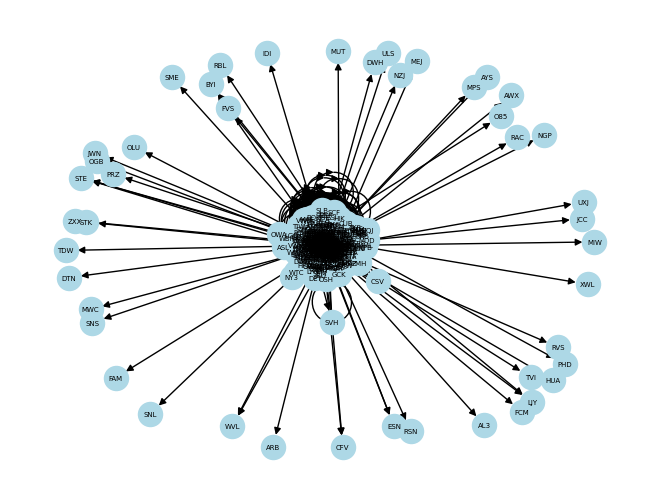

In [ ]:
#static visualization
nx.draw(flight_net, pos = nx.spring_layout(flight_net), with_labels=True,  node_color="lightblue", font_size=5)
plt.show()


The `analyze_graph_features` function from `functions.flight_net_analysis` analyzes a directed flight network graph by:

- Graph Properties: It calculates the number of nodes $N$ (airports), edges $E$ (flights), and density $D = \frac{E}{N^2}$ and classifies the graph as sparse, dense, or moderate based on density thresholds.

- Degree Analysis: It computes in-degree, out-degree, and degree for each node, visualizing the distributions with histograms.

- Hub Identification: It identifies airports with degrees higher than the 90th percentile and returns them as hubs in a DataFrame.

**Import Custom Functions**

In [ ]:
from functions.flight_net_analysis import analyze_graph_features, summarize_graph_features
from functions import flight_net_analysis
# Now reload the module
importlib.reload(flight_net_analysis)


<module 'functions.flight_net_analysis' from 'c:\\Users\\vikto\\Documents\\uni\\ADM\\ADM_HM5\\functions\\flight_net_analysis.py'>

In [ ]:
analyze_graph_features(flight_net)


{'N': 727,
 'E': 36719,
 'density': 0.06947395507152872,
 'density_type': 'sparse',
 'in_degrees': {'TWF': 75,
  'SYI': 5,
  'KTN': 21,
  'SMF': 116,
  'ANC': 114,
  'ALB': 128,
  'AST': 3,
  'CAE': 172,
  'RDG': 40,
  'SHN': 1,
  'ELN': 3,
  'MIO': 7,
  'LNS': 10,
  'SAD': 1,
  'MRI': 5,
  'KY1': 1,
  'ELM': 45,
  'BRL': 16,
  'CAK': 143,
  'RIV': 53,
  'CEC': 13,
  'ESF': 11,
  'MVW': 5,
  'NZC': 19,
  'FFO': 7,
  'ITO': 11,
  'BQK': 24,
  'SVC': 4,
  'JHW': 19,
  'LKE': 10,
  'BTV': 85,
  'ARA': 14,
  'HOU': 164,
  'AFW': 105,
  'NPA': 6,
  'BMC': 1,
  'DPA': 51,
  'CGI': 48,
  'AIY': 1,
  'ATL': 259,
  'LWF': 1,
  'OWA': 1,
  'NC3': 3,
  'LOZ': 6,
  'DAY': 186,
  'LUF': 6,
  'FVS': 1,
  'ESN': 2,
  'GLH': 44,
  'OKK': 25,
  'LEX': 164,
  'PSF': 3,
  'DOV': 57,
  'MCC': 18,
  'BAD': 23,
  'MGM': 122,
  'HON': 17,
  'DVT': 4,
  'GFL': 6,
  'HUF': 44,
  'TN6': 1,
  'JAN': 138,
  'AR1': 1,
  'GRD': 1,
  'MKL': 39,
  'THA': 4,
  'EIL': 22,
  'PDK': 46,
  'MEI': 29,
  'PWA': 3,
  'PIB': 

Number of nodes N = 727
Number of edges E = 36719
Density D = 0.06947395507152872
The graph is sparse (Density = 0.06947395507152872)


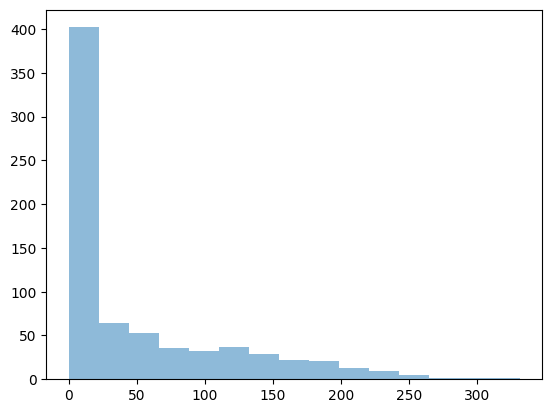

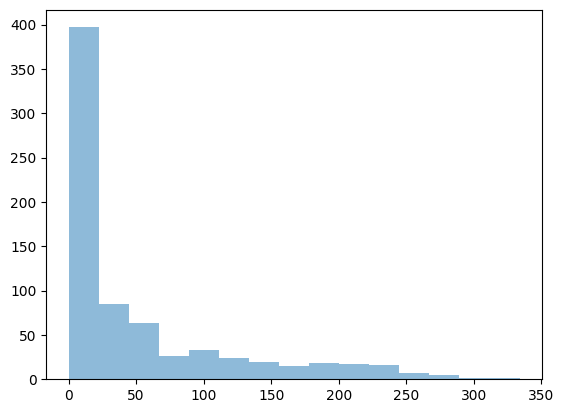


Hubs (airports with degree > 90th percentile):
   Airport  Degree
0      CAE     357
1      HOU     339
2      ATL     539
3      DAY     392
4      LEX     343
..     ...     ...
68     TUL     378
69     LRD     389
70     PHL     429
71     LIT     424
72     SFO     373

[73 rows x 2 columns]


In [ ]:
summarize_graph_features(flight_net)


## 2. Nodes' Contribution (Q2)

In any network, certain nodes (airports, in this case) play a critical role in maintaining connectivity and flow. Centrality measures are used to identify these nodes.

### **Your Task:**

1. Implement a function `analyze_centrality(flight_network, airport)` that computes the following centrality measures for a given airport:
    - _Betweenness centrality_: Measures how often a node appears on the shortest paths between other nodes.
    - _Closeness centrality_: Measures how easily a node can access all other nodes in the network.
    - _Degree centrality_: Simply counts the number of direct connections to the node.
    - _PageRank_: Computes the "importance" of a node based on incoming connections and their weights.
2. Write a function `compare_centralities(flight_network)` to:
    - Compute and compare centrality values for all nodes in the graph.
    - Plot centrality distributions (histograms for each centrality measure).
    - Return the top 5 airports for each centrality measure.

3. Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task. How can you check that the results given by the LLM are trustable?
4. Implement one of these measures suggested by the LLM, compare its results to the centralities you've already computed, and analyze whether it adds any new insights.

## 3. Finding Best Routes (Q3)
Whenever you plan to fly to a specific city, your goal is to find the most efficient and fastest flight to reach your destination. In the system you are designing, the best route is defined as the one that minimizes the total distance flown to the greatest extent possible.

- In this task, you need to implement a function that, given an origin and destination city, determines the best possible route between them. To simplify, the focus will be limited to flights operating on a specific day.

__Note__: Each city may have multiple airports; in such cases, the function should calculate the best route for every possible airport pair between the two cities. For example, if city $A$ has airports $a_1, a_2$ and  city B has $b_1, b_2$, the function should compute the best routes for $a_1 \rightarrow b_1$, $a_1 \rightarrow b_2$, $a_2 \rightarrow b_1$ and $a_2 \rightarrow b_2$. If it’s not possible to travel from one airport in the origin city to another airport in the destination city on that date, you must report it as well.

The function takes the following inputs:
1. Flights network
2. Origin city name
3. Destination city name
4. Considered Date (in yyyy-mm-dd format)

The function output:
1. A table with three columns: 'Origin_city_airport', 'Destination_city_airport', and the 'Best_route'.

__Note__: In the "Best_route" column, we expect a list of airport names connected by $\rightarrow$, showing the order in which they are to be visited during the optimal route. If no such route exists, the entry should display "No route found."

## 4. Airline Network Partitioning (Q4)
Imagine all these flights are currently managed by a single airline. However, this airline is facing bankruptcy and plans to transfer the management of part of its operations to a different airline. The airline is willing to divide the flight network into two distinct partitions, $p_1 $and $p_2$, such that no flights connect any airport in $p_1$ to any airport in $p_2$. The flights in $p_1$ will remain under the management of the original airline, while those in $p_2$ will be handed over to the second airline. Any remaining flights needed to connect these two partitions will be determined later.

- In graph theory, this task is known as a graph disconnection problem. Your goal is to write a function that removes the minimum number of flights between airports to separate the original flight network into two disconnected subgraphs.

The function takes the following inputs:
1. Flight network

The function outputs:
1. The flights removed to disconnect the graph.
2. Visualize the original flight network.
3. Visualize the graph after removing the connections and highlight the two resulting subgraphs.

__Note:__ In this task, airline only concerned with the flights between airports, and the flight times are not relevant.

## 5. Finding and Extracting Communities (Q5)
Airlines can optimize their operations by identifying communities within a flight network. These communities represent groups of airports with strong connections, helping airlines pinpoint high-demand regions for expansion or underserved areas for consolidation. By analyzing these communities, airlines can improve resource allocation, reduce costs, and enhance service quality.

1. In this task, you are asked to analyze the graph and identify the communities based on the flight network provided. For the airline, the primary focus is on the cities, so your communities should reflect the connectivity between cities through the flights that link them.

The function takes the following inputs:
1. Flight network
2. A city name $c_1$
3. A city name $c_2$

The function outputs:
1. The total number of communities and the cities that belong to each community
2. Visualize the graph highlighting the communities within the network (each community with different color)
3. If city $c_1$ and $c_2$ belong to the same community or not

__Note:__ To understand the community detection task and a method for accomplishing it, you can refer to [this](https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/)

2. Ask a LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to suggest an alternative algorithm for extracting communities and explain the steps required to implement it. Then, implement this algorithm and compare its results with the current method you've chosen. Discuss the differences in the outcomes and analyze which approach you think is better, providing reasons for your choice.

## Algorithmic Question (AQ)

Arya needs to travel between cities using a network of flights. Each flight has a fixed cost (in euros), and she wants to find the cheapest possible way to travel from her starting city to her destination city. However, there are some constraints on the journey:

1. Arya can make at most `k` stops during her trip (this means up to `k+1` flights).
2. If no valid route exists within these constraints, the result should be `-1`.

Given a graph of cities connected by flights, your job is to find the minimum cost for Arya to travel between two specified cities (`src` to `dst`) while following the constraints. 

### Your Task

- **a)** Write a pseudocode that describes the algorithm to find the cheapest route with at most `k` stops. 
  
- **b)** Implement the algorithm in Python and simulate the given test cases.

- **c)** Analyze the algorithm's efficiency. Provide its time complexity and space complexity, and explain whether it is efficient for large graphs (e.g., `n > 100`).

- **d)** Optimize the algorithm to handle larger graphs. Provide an updated pseudocode and analyze the computational complexity of your optimization.

- **e)** Ask LLM (e.g., ChatGPT) for an optimized version of your algorithm. Compare its solution to yours in terms of performance, time complexity, and correctness.

### Examples

#### Example 1

**Input:**

```py
n = 4  
flights = [[0, 1, 100], [1, 2, 100], [2, 0, 100], [1, 3, 600], [2, 3, 200]]  
src = 0  
dst = 3  
k = 1  
```
**Output:**

```py
700  
```

**Explanation:**  
Arya's optimal path with at most 1 stop is `0 → 1 → 3`, costing 100 + 600 = 700 euros.  
The path `0 → 1 → 2 → 3` is cheaper but requires 2 stops, which violates the constraints.


#### Example 2

**Input:**
```py
n = 3  
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]  
src = 0  
dst = 2  
k = 1  
```
**Output:**
```py
200  
```
**Explanation:**  
Arya's optimal path with at most 1 stop is `0 → 1 → 2`, costing 100 + 100 = 200 euros.


#### Example 3

**Input:**
```py
n = 3  
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]  
src = 0  
dst = 2  
k = 0  
```
**Output:**
```py
500  
```
**Explanation:**  
Arya cannot make any stops. The only valid route is `0 → 2`, costing 500 euros.

#### Example 4

**Input:**
```py
n = 4  
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 300]]  
src = 0  
dst = 3  
k = 2  
```
**Output:**
```py
400  
```
**Explanation:**  
Arya can take `0 → 1 → 3` and `0 → 2 → 3`, however first one is cheaper, costing 400 euros.

#### Example 5

**Input:**
```py
n = 4  
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 200]]  
src = 0  
dst = 3  
k = 2  
```
**Output:**
```py
400  
```
**Explanation:**  
Arya can take `0 → 1 → 3` and `0 → 2 → 3` like last example. However we have a tie, so it does not matter the route we take, the cost is still 400.